# Instructions

In order for this notebook to work properly, file_name has to be set
and should point to a tensorflow run that has tensors with
"sparsity" and "\_grad" in its names

## Goal

This notebook will print graphs that are displayed on tensorboard

In [1]:
import tensorflow as tf
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
file_name="/tmp/cifar10_train-10k/events.out.tfevents.1563318583.aurora01"
my_values = list()
for summary in tf.train.summary_iterator(file_name):
    for v in summary.summary.value:
        if v.tag == '00a_conv1/03_relu_1/sparsity' or v.tag == 'Other name':
            my_values.append(v.simple_value)
            
my_values = np.array(my_values)

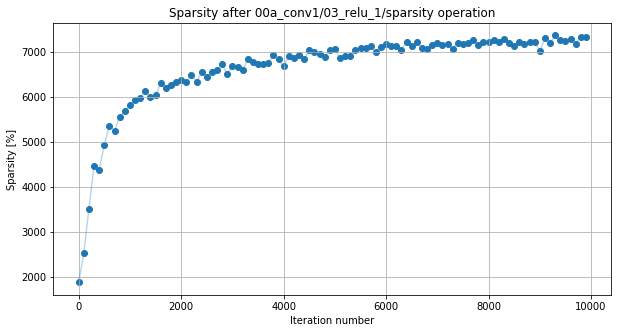

In [13]:
plt.figure(figsize=[10,5])
plt.grid()
plt.scatter(np.linspace(1,9901,len(my_values)), my_values*100,marker='o')
plt.plot(np.linspace(1,9901,len(my_values)), my_values*100, alpha=0.3)

ax = plt.gca()
#ax.set(ylim=(0, 1))
plt.title("Sparsity after 00a_conv1/03_relu_1/sparsity operation")
plt.ylabel("Sparsity [%]")
plt.xlabel("Iteration number")

plt.savefig("figs/relu_sparsity.png", dpi=450)

In [4]:
my_dict=defaultdict(list)
for summary in tf.train.summary_iterator("/tmp/cifar10_train/events.out.tfevents.1563318583.aurora01"):
    for v in summary.summary.value:
        if "sparsity" in v.tag:
            my_dict[v.tag].append(v.simple_value)
        
print("All the values that have sparsity are presented in: my_dict")     

All the values that have sparsity are presented in: my_dict


In [5]:
for k,v in my_dict.items():
    print(k)

00a_conv1/01_conv_out_1/sparsity
00a_conv1/02_conv_plus_bias_1/sparsity
00a_conv1/03_relu_1/sparsity
00b_after_conv1/00_pool_1/sparsity
00b_after_conv1/01_norm_1/sparsity
01a_conv2/01_conv_out_2/sparsity
01a_conv2/02_conv_plus_bias_2/sparsity
01a_conv2/03_relu_2/sparsity
01b_after_conv2/00_norm_2/sparsity
01b_after_conv2/01_pool_2/sparsity
gradients/00a_conv1/03_relu_1_grad/ReluGrad/sparsity
gradients/00a_conv1/03_relu_1_grad/ReluGrad/sparsity_1
gradients/00b_after_conv1/00_pool_1_grad/MaxPoolGrad/sparsity
gradients/00b_after_conv1/01_norm_1_grad/LRNGrad/sparsity
gradients/01a_conv2/01_conv_out_2_grad/Conv2DBackpropInput/sparsity
gradients/01a_conv2/03_relu_2_grad/ReluGrad/sparsity
gradients/01a_conv2/03_relu_2_grad/ReluGrad/sparsity_1
gradients/01b_after_conv2/00_norm_2_grad/LRNGrad/sparsity
gradients/01b_after_conv2/01_pool_2_grad/MaxPoolGrad/sparsity
gradients/04a_local3/Reshape_grad/Reshape/sparsity
00a_conv1/00_weights_1/gradients/sparsity
00a_conv1/01_biases_1/gradients/sparsity


In [6]:
if False: # Preventing the plotting of several figures
    for k,v in my_dict.items():
        plt.figure(figsize=[10,5])
        plt.grid()
        my_values = np.array(v)*100
        plt.scatter(np.linspace(1,9901,len(my_values)), my_values,marker='o',)
        plt.plot(np.linspace(1,9901,len(my_values)), my_values,marker='x', alpha=0.3)

        #ax = plt.gca()
        #ax.set(ylim=(0, 1))
        plt.title("Sparsity of "+ k)
        plt.ylabel("Sparsity [%]")
        plt.xlabel("Iteration number")

In [7]:
forward_count = 0
back_count=0
back_special_count=0
for k in my_dict.keys():
    if("_grad/" in k):
        back_special_count+=1
    elif("/gradients/" in k):
        back_count+=1
    else:
        forward_count+=1
print(forward_count, back_count, back_special_count)

10 10 10


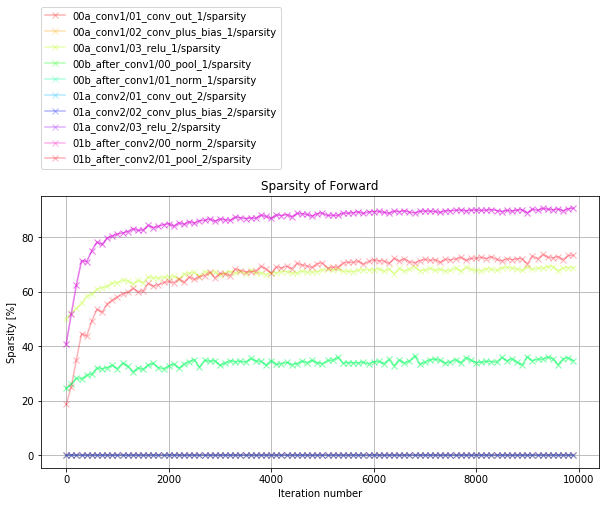

In [12]:
NUM_COLORS = forward_count

#cm = plt.get_cmap('gist_rainbow')
plt.figure(figsize=[10,5])
ax = plt.gca()
ax.set_prop_cycle('color',plt.cm.hsv(np.linspace(0,1,NUM_COLORS)))
for k,v in my_dict.items():
    if (not(("_grad/" in k) or ("/gradients/" in k))):

        my_values = np.array(v)*100
        #plt.scatter(np.linspace(1,9901,len(my_values)), my_values,marker='o')
        plt.plot(np.linspace(1,9901,len(my_values)), my_values,marker='x', alpha=0.3, label=k)


    #ax.set(ylim=(0, 1))    

plt.grid()
ax.legend(loc=(0,1.1))
plt.title("Sparsity of Forward")
plt.ylabel("Sparsity [%]")
plt.xlabel("Iteration number")

plt.savefig("figs/cifar_forward_selected.png",bbox_inches='tight', dpi=450)

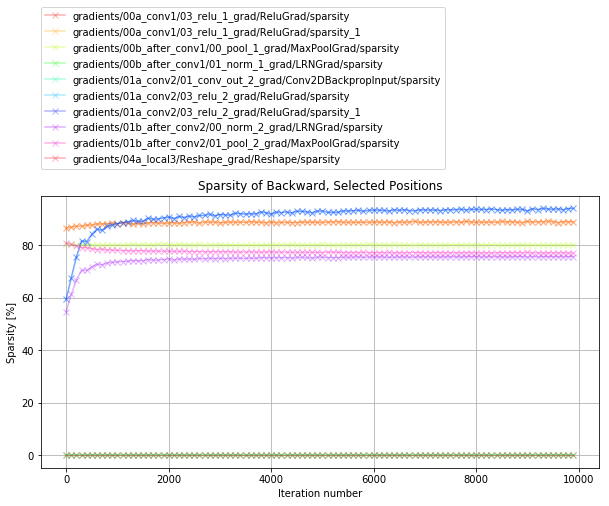

In [11]:
NUM_COLORS = back_count

#cm = plt.get_cmap('gist_rainbow')
plt.figure(figsize=[10,5])
ax = plt.gca()
ax.set_prop_cycle('color',plt.cm.hsv(np.linspace(0,1,NUM_COLORS)))
for k,v in my_dict.items():
    if ("_grad/" in k):

        my_values = np.array(v)*100
        #plt.scatter(np.linspace(1,9901,len(my_values)), my_values,marker='o')
        plt.plot(np.linspace(1,9901,len(my_values)), my_values,marker='x', alpha=0.3, label=k)


    #ax.set(ylim=(0, 1))    

plt.grid()
ax.legend(loc=(0,1.1))
plt.title("Sparsity of Backward, Selected Positions")
plt.ylabel("Sparsity [%]")
plt.xlabel("Iteration number")

plt.savefig("figs/cifar_back_selected.png",bbox_inches='tight', dpi=450)

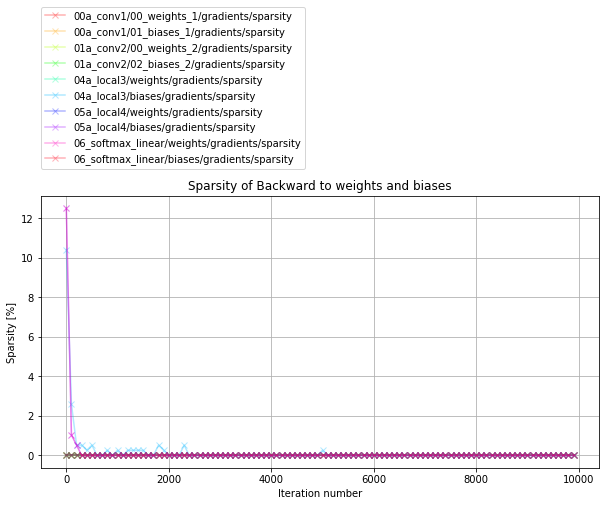

In [10]:
NUM_COLORS = back_count

#cm = plt.get_cmap('gist_rainbow')
plt.figure(figsize=[10,5])
ax = plt.gca()
ax.set_prop_cycle('color',plt.cm.hsv(np.linspace(0,1,NUM_COLORS)))
for k,v in my_dict.items():
    if ("/gradients/" in k):

        my_values = np.array(v)*100
        #plt.scatter(np.linspace(1,9901,len(my_values)), my_values,marker='o')
        plt.plot(np.linspace(1,9901,len(my_values)), my_values,marker='x', alpha=0.3, label=k)


    #ax.set(ylim=(0, 1))    

plt.grid()
ax.legend(loc=(0,1.1))
plt.title("Sparsity of Backward to weights and biases")
plt.ylabel("Sparsity [%]")
plt.xlabel("Iteration number")

plt.savefig("figs/cifar_back_weights_and_bias.png",bbox_inches='tight', dpi=450)